![Colegio Bourbaki](./Images/Bourbaki.png)

## Machine Learning

### Medida del Coseno

La medida del coseno calcula el producto punto normalizado L2 de dos vectores. Es decir, si A y B son vectores, su similitud de coseno se define como:

$\text{similitud de coseno} = \frac{A \cdot B}{\|A\|_2 \cdot \|B\|_2}$

Esto se llama similitud de coseno porque la normalización Euclidiana (L2) proyecta los vectores sobre la esfera unitaria, y su producto punto es entonces el coseno del ángulo entre los puntos denotados por los vectores.

Este método es una elección popular para calcular la similitud de documentos representados como vectores.

Puede entenderse de manera intuitiva considerando los siguientes puntos:

* **Dirección en el Espacio Vectorial:** Imagina que los vectores representan puntos en un espacio vectorial. La similitud de coseno se centra en la dirección más que en la magnitud de los vectores. Dos vectores que apuntan en la misma dirección tendrán una similitud de coseno cercana a 1, mientras que vectores 
perpendiculares tendrán una similitud cercana a 0.

* **Ángulo entre Vectores:** La similitud de coseno mide el coseno del ángulo entre los vectores. Un coseno de 1 indica que los vectores están en la misma dirección, un coseno de 0 significa que son ortogonales (forman un ángulo de 90 grados), y un coseno de -1 indica que están en direcciones opuestas.

* **Independencia de la Magnitud:** Una ventaja importante de la similitud de coseno es que es independiente de la magnitud de los vectores. Solo se enfoca en la orientación, no en la escala. Esto es útil en casos como la comparación de documentos, donde la longitud de los documentos puede variar.

En resumen, la similitud de coseno cuantifica la similitud direccional entre dos vectores, ignorando la magnitud. Es particularmente útil en tareas como la recuperación de información, clasificación de texto y sistemas de recomendación. Cuanto más cercano a 1 sea el valor de similitud de coseno, más similares son los vectores en términos de dirección.

**Ventajas de la Similitud de Coseno:**

* **Invariancia a la Magnitud:** La similitud de coseno es invariante a la magnitud de los vectores. Esto significa que no importa cuánto difieran en magnitud, siempre y cuando apunten en la misma dirección, la similitud de coseno será alta.

* **Eficiencia en Espacios de Alta Dimensión:** La similitud de coseno funciona bien en espacios vectoriales de alta dimensión, como en el caso de representaciones vectoriales de documentos. Otros métodos pueden sufrir en dimensiones altas debido a la maldición de la dimensionalidad.

* **Interpretación Geométrica Clara:** La interpretación geométrica de la similitud de coseno como el coseno del ángulo entre los vectores es intuitiva y fácil de entender.

* **Utilidad en Texto y Minería de Datos:** Es ampliamente utilizado en minería de texto, sistemas de recomendación y recuperación de información, ya que puede capturar similitudes semánticas entre documentos o términos.

**Desventajas de la Similitud de Coseno:**

* **Sensibilidad a Vectores Cero:** Si un vector tiene muchos elementos iguales a cero, la similitud de coseno puede ser sensible a pequeños cambios, ya que la magnitud del vector se vuelve crítica en esos casos.

* **No Considera Interacciones no Lineales:** No tiene en cuenta las interacciones no lineales entre las dimensiones de los vectores. En algunos casos, modelos más complejos pueden ser necesarios para capturar relaciones más sofisticadas.

* **Sensible a Ruido no Guassiano y Palabras Comunes:** En aplicaciones de procesamiento de lenguaje natural, la similitud de coseno puede ser sensible a palabras comunes y ruido. Métodos avanzados que ponderan términos según su importancia, como TF-IDF, pueden ser preferibles en tales casos.

In [1]:
from sklearn.metrics.pairwise import cosine_similarity
help(cosine_similarity)

Help on function cosine_similarity in module sklearn.metrics.pairwise:

cosine_similarity(X, Y=None, dense_output=True)
    Compute cosine similarity between samples in X and Y.

    Cosine similarity, or the cosine kernel, computes similarity as the
    normalized dot product of X and Y:

        K(X, Y) = <X, Y> / (||X||*||Y||)

    On L2-normalized data, this function is equivalent to linear_kernel.

    Read more in the :ref:`User Guide <cosine_similarity>`.

    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples_X, n_features)
        Input data.

    Y : {array-like, sparse matrix} of shape (n_samples_Y, n_features),             default=None
        Input data. If ``None``, the output will be the pairwise
        similarities between all samples in ``X``.

    dense_output : bool, default=True
        Whether to return dense output even when the input is sparse. If
        ``False``, the output is sparse if both input arrays are sparse.

        .. 

Ejemplificación:

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
# Function to calculate and plot cosine similarity
def calculate_and_plot_cosine_similarity(vector1, vector2, label1, label2):
    # Reshape the vectors to be 2D arrays
    vector1 = np.array(vector1).reshape(1, -1)
    vector2 = np.array(vector2).reshape(1, -1)

    # Calculate cosine similarity
    similarity = cosine_similarity(vector1, vector2)[0, 0]

    # Plotting the vectors
    plt.figure(figsize=(8, 8))
    plt.quiver(0, 0, vector1[0, 0], vector1[0, 1], angles='xy', scale_units='xy', scale=1, color='r', label=label1)
    plt.quiver(0, 0, vector2[0, 0], vector2[0, 1], angles='xy', scale_units='xy', scale=1, color='b', label=label2)

    # Set plot limits
    plt.xlim(-5, 5)
    plt.ylim(-5, 5)

    # Add labels, title, and legend
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.title(f'Cosine Similarity: {similarity:.5f}')
    plt.legend()

    # Show the plot
    plt.grid(True)
    plt.show()

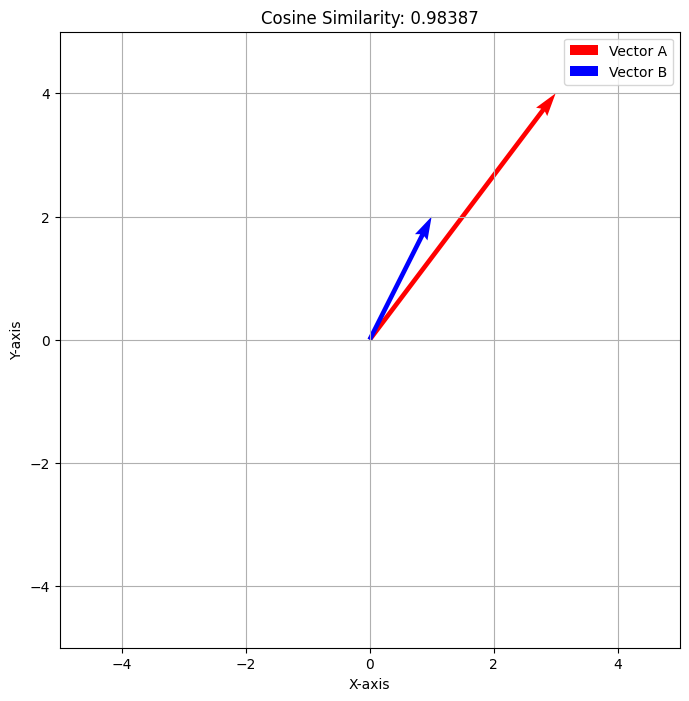

In [4]:
# Example vectors
vector_A = np.array([3, 4])
vector_B = np.array([1, 2])
vector_D = np.array([4, -1])

# Calculate and plot cosine similarity for Example 1
calculate_and_plot_cosine_similarity(vector_A, vector_B, 'Vector A', 'Vector B')

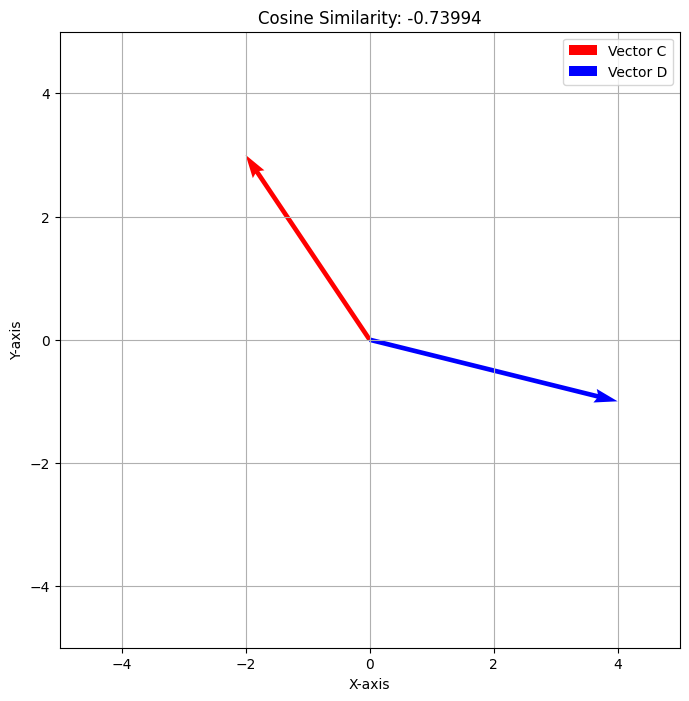

In [5]:
vector_C = np.array([-2, 3])
# Calculate and plot cosine similarity for Example 2
calculate_and_plot_cosine_similarity(vector_C, vector_D, 'Vector C', 'Vector D')

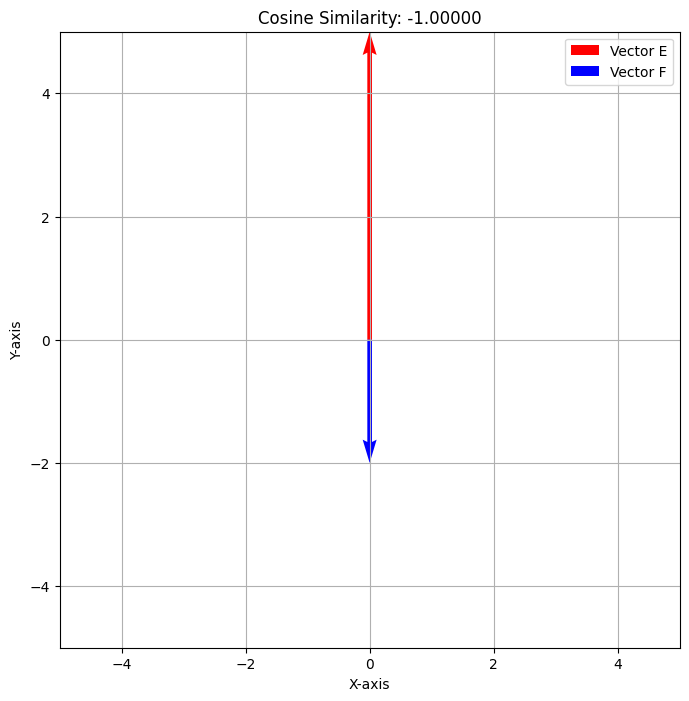

In [6]:
vector_E = np.array([0, 5])
vector_F = np.array([0, -2])
# Calculate and plot cosine similarity for Example 3
calculate_and_plot_cosine_similarity(vector_E, vector_F, 'Vector E', 'Vector F')

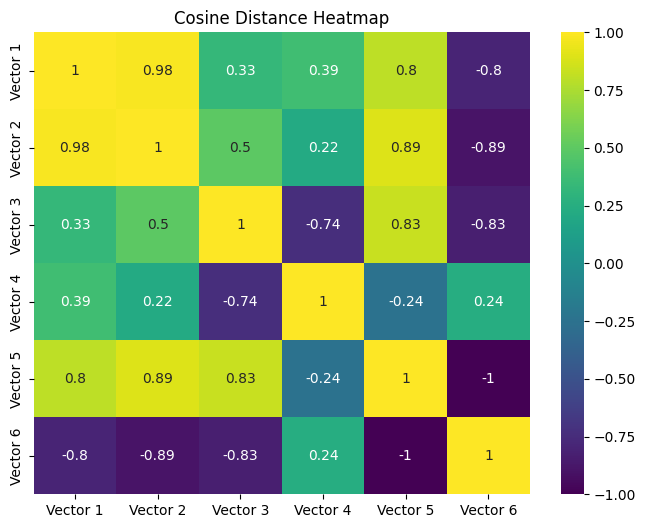

In [7]:
# Example vectors
vectors = np.array([
    [3, 4],
    [1, 2],
    [-2, 3],
    [4, -1],
    [0, 5],
    [0, -2]
])

# Calculate cosine similarity matrix
cosine_sim_matrix = cosine_similarity(vectors)

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cosine_sim_matrix, annot=True, cmap='viridis', xticklabels=['Vector 1', 'Vector 2', 'Vector 3', 'Vector 4', 'Vector 5', 'Vector 6'], yticklabels=['Vector 1', 'Vector 2', 'Vector 3', 'Vector 4', 'Vector 5', 'Vector 6'])
plt.title('Cosine Distance Heatmap')
plt.show()


### Librerías

In [8]:
#Data Analysis
import pandas as pd

#Utils
from sklearn.feature_extraction.text import CountVectorizer

### Carga de datos

In [9]:
df = pd.read_csv('./Data/winemag-data_first150k.csv')

In [10]:
df

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude
...,...,...,...,...,...,...,...,...,...,...,...
150925,150925,Italy,Many people feel Fiano represents southern Ita...,NaN,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Feudi di San Gregorio
150926,150926,France,"Offers an intriguing nose with ginger, lime an...",Cuvée Prestige,91,27.0,Champagne,Champagne,NaN,Champagne Blend,H.Germain
150927,150927,Italy,This classic example comes from a cru vineyard...,Terre di Dora,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Terredora
150928,150928,France,"A perfect salmon shade, with scents of peaches...",Grand Brut Rosé,90,52.0,Champagne,Champagne,NaN,Champagne Blend,Gosset


### Análisis exploratorio

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150930 entries, 0 to 150929
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   150930 non-null  int64  
 1   country      150925 non-null  object 
 2   description  150930 non-null  object 
 3   designation  105195 non-null  object 
 4   points       150930 non-null  int64  
 5   price        137235 non-null  float64
 6   province     150925 non-null  object 
 7   region_1     125870 non-null  object 
 8   region_2     60953 non-null   object 
 9   variety      150930 non-null  object 
 10  winery       150930 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 12.7+ MB


In [12]:
df.isna().sum()

Unnamed: 0         0
country            5
description        0
designation    45735
points             0
price          13695
province           5
region_1       25060
region_2       89977
variety            0
winery             0
dtype: int64

### Vectorización de textos

Para poder comparar las descripciones necesitamos vectorizar los textos de descripción para poder utilizar la similtud del coseno:

**Bolsa de palabras (Bag of Words - BoW)**

BoW es una técnica de vectorización que representa un documento como un conjunto desordenado de palabras y su frecuencia en ese documento. 

Cada palabra se asigna a una posición única en un vector, y el valor en esa posición indica cuántas veces aparece esa palabra en el documento. 

***BoW no captura el orden de las palabras ni las relaciones semánticas, pero es simple y efectivo para tareas básicas.***

In [13]:
# unigram vector representation
vectorizer = CountVectorizer(stop_words='english',
                     lowercase=True,
                     max_df=0.95, 
                     min_df=0.15,
                     ngram_range = (1,2),
                     )


In [14]:
doc_vectors = vectorizer.fit_transform(df['description'])

In [15]:
doc_vectors.shape

(150930, 13)

In [16]:
features = vectorizer.get_feature_names_out()

In [17]:
features, len(features)

(array(['acidity', 'aromas', 'black', 'cherry', 'drink', 'dry', 'finish',
        'flavors', 'fruit', 'palate', 'ripe', 'tannins', 'wine'],
       dtype=object),
 13)

In [18]:
pd.DataFrame(doc_vectors.todense(), columns=features)

,acidity,aromas,black,cherry,drink,dry,finish,flavors,fruit,palate,ripe,tannins,wine
0,0,0,0,1,0,0,1,0,1,1,0,1,1
1,0,1,1,0,1,0,1,1,0,1,1,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0,1,1,1,1,0,1,1,1,0,0,1,0
4,1,0,0,0,1,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
150925,0,0,0,0,0,0,0,0,0,0,0,0,1
150926,0,0,0,0,0,0,0,0,0,1,0,0,0
150927,0,0,0,0,0,0,1,0,0,1,0,0,0
150928,0,0,0,1,0,0,1,0,1,1,1,0,0


In [19]:
def generate_wordcloud(texts):
    from wordcloud import WordCloud
    """ Genera una nube de palabras a partir de una lista de textos """
    # Crear la cadena con la que haremos la nube de palabras
    combined_text = " ".join(text for text in texts)
    
    # Crear la nube de palabras
    wordcloud = WordCloud(max_font_size=50, 
                          max_words=100, 
                          background_color="white", 
                          normalize_plurals=False, 
                          collocations=False).generate(combined_text)
    

    # Desplegar la imagen generada
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

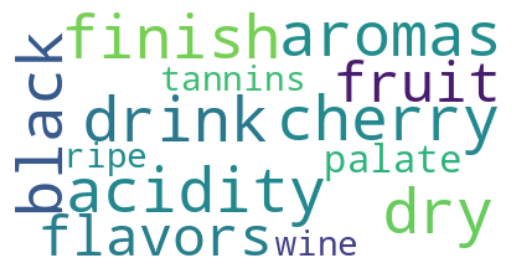

In [20]:
generate_wordcloud(features)

### Búsqueda en base de datos

In [21]:
def comparison_description(query, results_number=20):
    # Vectorize the query
    q_vector = vectorizer.transform([query])
    
    # Calculate cosine similarity with all document vectors
    similarities = cosine_similarity(q_vector, doc_vectors).flatten()
    
    # Get indices of the top results_number elements sorted by similarity
    sorted_indices = np.argsort(similarities)[::-1][:results_number]

    print(f"Comparable Description: {query} \n")

    for i, idx in enumerate(sorted_indices):
        similarity = similarities[idx]
        print(f"Review {i+1} Similarity: {similarity:.10f} | Description #: {idx}")

    if similarities[sorted_indices[-1]] == 0.0:
        print("\nNo similar descriptions")
    else:
        max_similarity_index = sorted_indices[0]
        print(f"\nThe Review Most similar to the Comparable Description is Description # {max_similarity_index}")
        print(f"Similarity: {similarities[max_similarity_index]:.5f}")
        print(f"Comparison found: {df['description'].loc[max_similarity_index]}")



In [22]:
comparison_description(df['description'][0])

Comparable Description: This tremendous 100% varietal wine hails from Oakville and was aged over three years in oak. Juicy red-cherry fruit and a compelling hint of caramel greet the palate, framed by elegant, fine tannins and a subtle minty tone in the background. Balanced and rewarding from start to finish, it has years ahead of it to develop further nuance. Enjoy 2022–2030. 

Review 1 Similarity: 1.0000000000 | Description #: 62084
Review 2 Similarity: 1.0000000000 | Description #: 7130
Review 3 Similarity: 1.0000000000 | Description #: 114524
Review 4 Similarity: 1.0000000000 | Description #: 145153
Review 5 Similarity: 1.0000000000 | Description #: 80705
Review 6 Similarity: 1.0000000000 | Description #: 8140
Review 7 Similarity: 1.0000000000 | Description #: 31655
Review 8 Similarity: 1.0000000000 | Description #: 0
Review 9 Similarity: 0.9799578870 | Description #: 22615
Review 10 Similarity: 0.9525793444 | Description #: 32234
Review 11 Similarity: 0.9258200998 | Description #:

In [23]:
comparison_description("Bright, fresh fruit aromas of cherry, raspberry, and blueberry. Youthfully with lots of sweet fruit on the palate with hints of spice and vanilla.")

Comparable Description: Bright, fresh fruit aromas of cherry, raspberry, and blueberry. Youthfully with lots of sweet fruit on the palate with hints of spice and vanilla. 

Review 1 Similarity: 1.0000000000 | Description #: 128486
Review 2 Similarity: 1.0000000000 | Description #: 28385
Review 3 Similarity: 1.0000000000 | Description #: 140386
Review 4 Similarity: 1.0000000000 | Description #: 104276
Review 5 Similarity: 1.0000000000 | Description #: 3975
Review 6 Similarity: 1.0000000000 | Description #: 6781
Review 7 Similarity: 1.0000000000 | Description #: 8805
Review 8 Similarity: 1.0000000000 | Description #: 70366
Review 9 Similarity: 1.0000000000 | Description #: 148072
Review 10 Similarity: 0.9449111825 | Description #: 128622
Review 11 Similarity: 0.9449111825 | Description #: 145862
Review 12 Similarity: 0.9449111825 | Description #: 26052
Review 13 Similarity: 0.9449111825 | Description #: 47035
Review 14 Similarity: 0.9449111825 | Description #: 144689
Review 15 Similarity

In [24]:
comparison_description('A semi-dry white wine with pear, citrus, and tropical fruit flavors; crisp and refreshing.')

Comparable Description: A semi-dry white wine with pear, citrus, and tropical fruit flavors; crisp and refreshing. 

Review 1 Similarity: 1.0000000000 | Description #: 105121
Review 2 Similarity: 1.0000000000 | Description #: 124300
Review 3 Similarity: 1.0000000000 | Description #: 7538
Review 4 Similarity: 1.0000000000 | Description #: 124359
Review 5 Similarity: 1.0000000000 | Description #: 68721
Review 6 Similarity: 1.0000000000 | Description #: 63417
Review 7 Similarity: 1.0000000000 | Description #: 107785
Review 8 Similarity: 1.0000000000 | Description #: 31297
Review 9 Similarity: 1.0000000000 | Description #: 97784
Review 10 Similarity: 1.0000000000 | Description #: 15354
Review 11 Similarity: 1.0000000000 | Description #: 69246
Review 12 Similarity: 1.0000000000 | Description #: 21199
Review 13 Similarity: 1.0000000000 | Description #: 131734
Review 14 Similarity: 1.0000000000 | Description #: 122944
Review 15 Similarity: 1.0000000000 | Description #: 132183
Review 16 Simila

In [25]:
comparison_description('BLENDED CANADIAN WHISKY ARE EXPERTLY BLENDED AND PATIENTLY AGED.')

Comparable Description: BLENDED CANADIAN WHISKY ARE EXPERTLY BLENDED AND PATIENTLY AGED. 

Review 1 Similarity: 0.0000000000 | Description #: 0
Review 2 Similarity: 0.0000000000 | Description #: 150929
Review 3 Similarity: 0.0000000000 | Description #: 16
Review 4 Similarity: 0.0000000000 | Description #: 17
Review 5 Similarity: 0.0000000000 | Description #: 18
Review 6 Similarity: 0.0000000000 | Description #: 19
Review 7 Similarity: 0.0000000000 | Description #: 20
Review 8 Similarity: 0.0000000000 | Description #: 21
Review 9 Similarity: 0.0000000000 | Description #: 22
Review 10 Similarity: 0.0000000000 | Description #: 23
Review 11 Similarity: 0.0000000000 | Description #: 24
Review 12 Similarity: 0.0000000000 | Description #: 25
Review 13 Similarity: 0.0000000000 | Description #: 26
Review 14 Similarity: 0.0000000000 | Description #: 27
Review 15 Similarity: 0.0000000000 | Description #: 28
Review 16 Similarity: 0.0000000000 | Description #: 29
Review 17 Similarity: 0.0000000000 

**Recuerde que la similitud del coseno puede definirse entre 1 y -1, siendo 0 totalmente ortogonal y 1 igual en dirección.**

**Ejercicios:**

1) ¿Cuál es la interpretación geométrica de la similitud de coseno?

2) ¿Cómo afecta la magnitud de los vectores a la similitud de coseno?

3) ¿Puedes pensar en un caso donde la magnitud de los vectores es importante y la similitud de coseno no sería la mejor opción?

4) Compara la similitud de coseno con la distancia euclidiana. ¿En qué escenarios podrías preferir una sobre la otra?

5) ¿Cuál podría ser un desafío al aplicar la similitud de coseno a documentos de texto?

6) Explica cómo la similitud de coseno maneja la presencia de ceros en vectores dispersos. ¿En qué situación podrías tener problemas con vectores que contienen muchos ceros?

7) **Observe la sensibilidad de la BoW cambiando los parámetros: max_df, min_df y n_gram.**

8) **Busque un vino de su interés en ingreselo como argumento en la notebook para ver si encuentra algún vino similar.**

9) **Diseñe desde 0 la función similitud_coseno que tenga como argumento dos vectores y pueda solucionar el mismo problema que hemos resuelto en esta notebook. Tenga en cuenta que los vectores pueden llegar a dispersos.**

![Lenguaje Matemático](./Images/Matematicas.png)

![Contacto](./Images/Contacto.png)